<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series Independent Practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Walmart Sales Data

For this independent practice, we'll analyze Walmart's weekly sales data over a two-year period from 2010 to 2012.

The data set is again separated by store and department, but we'll focus on analyzing one store for simplicity.

The data include:

* `Store`: The store number.
* `Dept`: The department number.
* `Date`: The week.
* `Weekly_Sales`: Sales for the given department in the given store.
* `IsHoliday`: Whether the week is a special holiday week.

### 1) Preprocess the data using Pandas.

* **Load the data.**
* **Convert the `Date` column to a `datetime` object.**
* **Set `Date` as the index of the DataFrame.**

In [2]:
walmart = pd.read_csv('../assets/data/train.csv')

In [3]:
# /scrub/
walmart['Date'] = pd.to_datetime(walmart['Date'])

In [4]:
# /scrub/
walmart.set_index('Date', inplace=True)

### 2) Filter the DataFrame to Store 1 sales and aggregate over departments to compute the total weekly sales per store. Store this in a new DataFrame.

In [5]:
# /scrub/
store1 = walmart[walmart.Store == 1][['Weekly_Sales']].resample('W', 'sum')

/Users/gGandenberger/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


### 3) Plot the rolling mean for `Weekly_Sales`. What general trends do you observe?

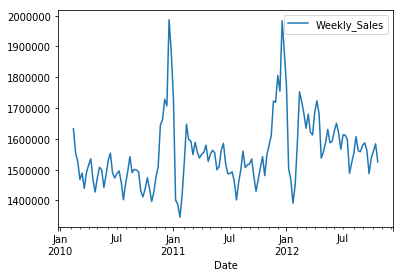

In [6]:
# /scrub/
fig, ax = plt.subplots()
store1.loc[:, ['Weekly_Sales']].rolling(window = 3, center = True).mean().plot(ax=ax);

### 4) Compute the `1`, `13`, and `52` autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [7]:
# /scrub/
print('Autocorrelation 1: ', store1['Weekly_Sales'].autocorr(1))
print('Autocorrelation 13: ', store1['Weekly_Sales'].autocorr(13))
print('Autocorrelation 52: ', store1['Weekly_Sales'].autocorr(52))

Autocorrelation 1:  0.3021582794113126
Autocorrelation 13:  0.10169228501987719
Autocorrelation 52:  0.8953760294777008


/Users/gGandenberger/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


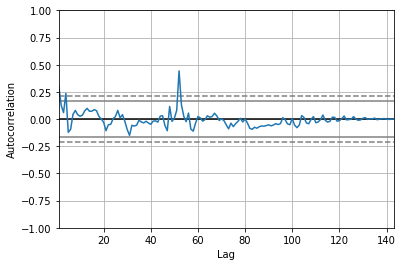

In [8]:
# /scrub/
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(store1['Weekly_Sales'])

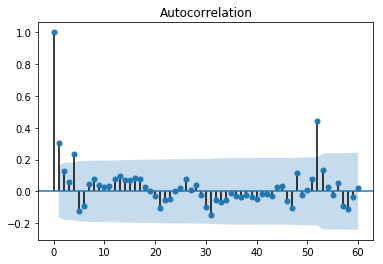

In [9]:
# /scrub/
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(store1['Weekly_Sales'], lags=60)
plt.show()

### 5) Create a decomposition plot for the Store 1 sales data. 

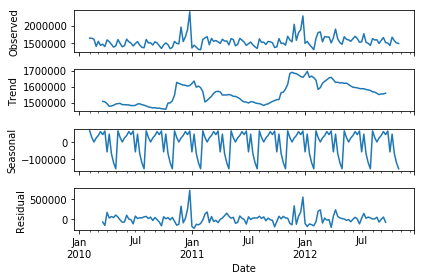

In [10]:
# /scrub/
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(store1.Weekly_Sales, freq=13)   
decomposition.plot() 
plt.show()

### 6) Based on the analyses above, what can we deduce about this time series?

Big autocorrelation spikes are happening around 52, indicating some kind of yearly pattern. Autocorrelation is high at 1 and 2 lags (perhaps even up to 4), so it's most likely useful for an autoregressive model. There are no random spikes, so there's probably not much use for a moving average model.